### Algorithm: CNN-1D including data engineering
### Author: Edgar Acuna  
### Created: August 20, 2024
### Dataset:NATOPS

In [43]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
 

In [44]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y = load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


### Training Data

In [45]:
# loading Training data
X, y = load_data("NATOPS",split="Train")

 Shape of X =  (180, 24, 51)
 Shape of y =  (180,)
 New shape of X =  (180, 51, 24)
 New shape of y =  (180, 6)


In [46]:
#class size in training 
import numpy as np
np.sum(y,axis=0)

array([30, 30, 30, 30, 30, 30])

In [47]:
X.shape

(180, 51, 24)

In [48]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

In [49]:
X1=X[yo==0]
X2=X[yo==1]
X3=X[yo==2]
X4=X[yo==3]
X5=X[yo==4]
X6=X[yo==5]
print(X3.shape)

(30, 51, 24)


In [50]:
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
Xa3=X3.mean(axis=0).T
Xa3=pd.DataFrame(Xa3)
Xa4=X4.mean(axis=0).T
Xa4=pd.DataFrame(Xa4)
Xa5=X5.mean(axis=0).T
Xa5=pd.DataFrame(Xa5)
Xa6=X6.mean(axis=0).T
Xa6=pd.DataFrame(Xa6)
print(Xa2.shape)

(24, 51)


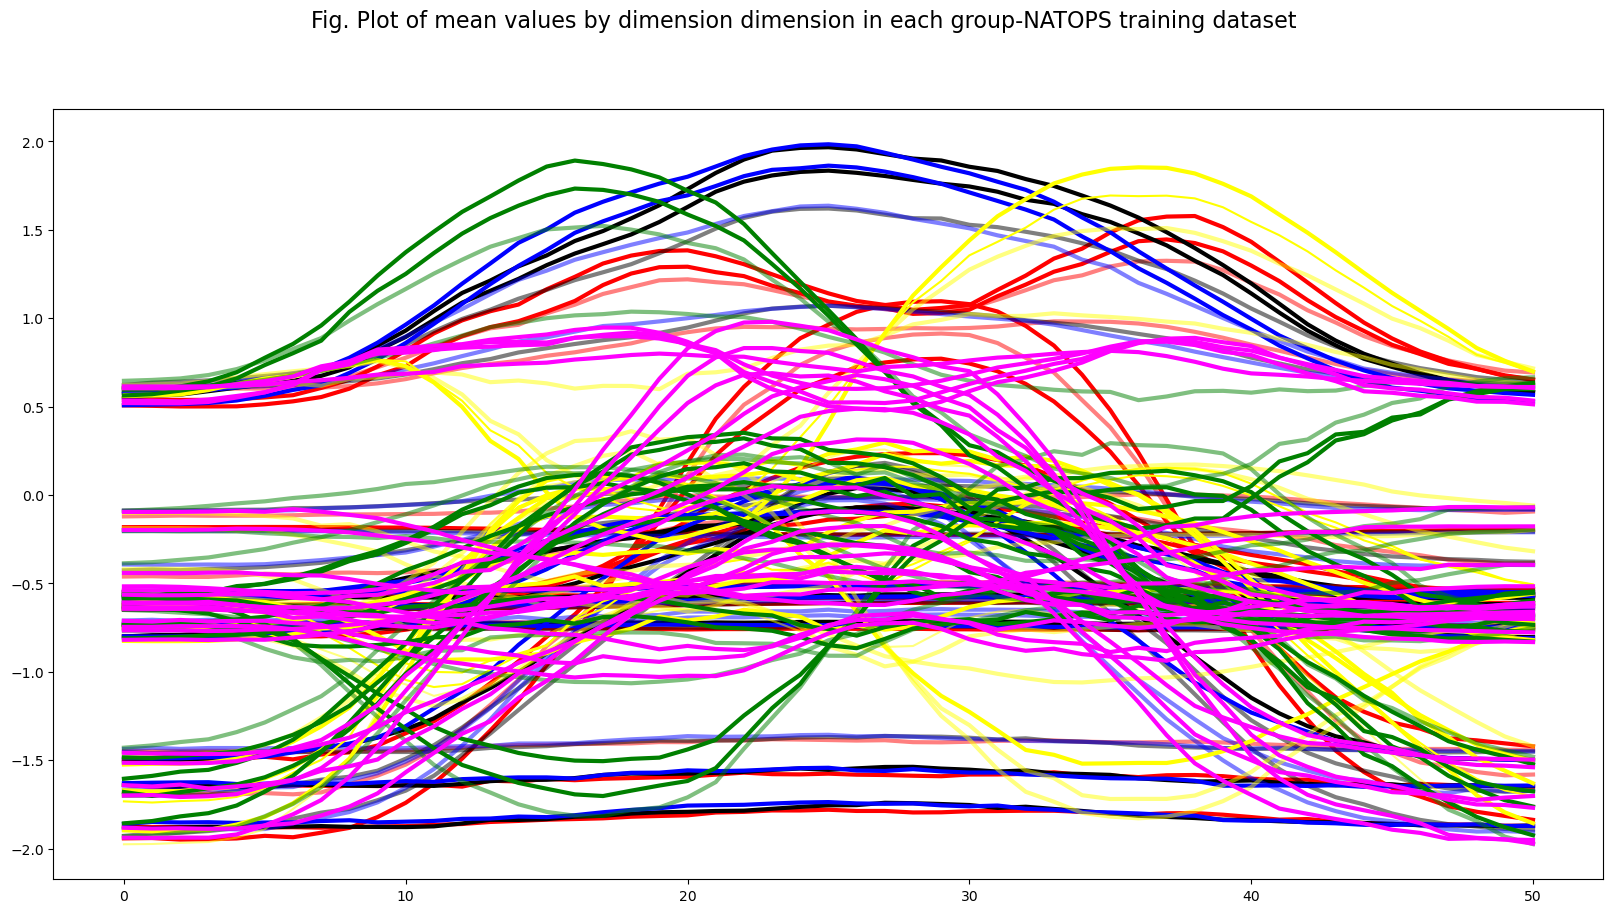

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,51,1)
fig.suptitle("Fig. Plot of mean values by dimension dimension in each group-NATOPS training dataset",fontsize=16)
ax.plot(ejex, Xa1.iloc[0,ejex], color='red',lw=3,  label='d1')
ax.plot(ejex,Xa1.iloc[1,ejex], color='red', lw=3, label='d2')
ax.plot(ejex, Xa1.iloc[2,ejex], color='red', lw=3, label='d3')
ax.plot(ejex,Xa1.iloc[3,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa1.iloc[4,ejex], color='red', lw=3, label='G1')
ax.plot(ejex,Xa1.iloc[5,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa1.iloc[6,ejex], color='red',lw=3, label='G1')
ax.plot(ejex,Xa1.iloc[7,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa1.iloc[8,ejex], color='red',lw=3, label='G1')
ax.plot(ejex, Xa1.iloc[9,ejex], color='red',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa1.iloc[10,ejex], color='red', lw=3, label='d2')
ax.plot(ejex, Xa1.iloc[11,ejex], color='red', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa1.iloc[12,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa1.iloc[13,ejex], color='red', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa1.iloc[14,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa1.iloc[15,ejex], color='red',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa1.iloc[16,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa1.iloc[17,ejex], color='red',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa1.iloc[18,ejex], color='red',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa1.iloc[19,ejex], color='red', lw=3, label='d2')
ax.plot(ejex, Xa1.iloc[20,ejex], color='red', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa1.iloc[21,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa1.iloc[22,ejex], color='red', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa1.iloc[23,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[0,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa2.iloc[1,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa2.iloc[2,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa2.iloc[3,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[4,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa2.iloc[5,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[6,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa2.iloc[7,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[8,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa2.iloc[9,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa2.iloc[10,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa2.iloc[11,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa2.iloc[12,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[13,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa2.iloc[14,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[15,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa2.iloc[16,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[17,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa2.iloc[18,ejex], color='red',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa2.iloc[19,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa2.iloc[20,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa2.iloc[21,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[22,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa2.iloc[23,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa3.iloc[0,ejex], color='blue',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa3.iloc[1,ejex], color='blue', lw=3, label='d2')
ax.plot(ejex, Xa3.iloc[2,ejex], color='blue', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa3.iloc[3,ejex], color='blue', lw=3, label='G2')
ax.plot(ejex, Xa3.iloc[4,ejex], color='blue', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa3.iloc[5,ejex], color='blue', lw=3, label='G2')
ax.plot(ejex, Xa3.iloc[6,ejex], color='blue',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa3.iloc[7,ejex], color='blue', lw=3, label='G2')
ax.plot(ejex, Xa3.iloc[8,ejex], color='blue',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa3.iloc[9,ejex], color='blue',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa3.iloc[10,ejex], color='blue', lw=3, label='d2')
ax.plot(ejex, Xa3.iloc[11,ejex], color='blue', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa3.iloc[12,ejex], color='blue', lw=3, label='G2')
ax.plot(ejex, Xa3.iloc[13,ejex], color='blue', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa3.iloc[14,ejex], color='blue', lw=3, label='G2')
ax.plot(ejex, Xa3.iloc[15,ejex], color='blue',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa3.iloc[16,ejex], color='blue', lw=3, label='G2')
ax.plot(ejex, Xa3.iloc[17,ejex], color='blue',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa3.iloc[18,ejex], color='blue',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa3.iloc[19,ejex], color='blue', lw=3, label='d2')
ax.plot(ejex, Xa3.iloc[20,ejex], color='blue', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa3.iloc[21,ejex], color='blue', lw=3, label='G2')
ax.plot(ejex, Xa3.iloc[22,ejex], color='blue', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa3.iloc[23,ejex], color='blue', lw=3, label='G2')
ax.plot(ejex, Xa4.iloc[0,ejex], color='yellow',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa4.iloc[1,ejex], color='yellow', lw=3, label='d2')
ax.plot(ejex, Xa4.iloc[2,ejex], color='yellow', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa4.iloc[3,ejex], color='yellow', lw=3, label='G2')
ax.plot(ejex, Xa4.iloc[4,ejex], color='yellow', alpha=0.5, label='G1')
ax.plot(ejex,Xa4.iloc[5,ejex], color='yellow', label='G2')
ax.plot(ejex, Xa4.iloc[6,ejex], color='yellow',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa4.iloc[7,ejex], color='yellow', lw=3, label='G2')
ax.plot(ejex, Xa4.iloc[8,ejex], color='yellow',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa4.iloc[9,ejex], color='yellow',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa4.iloc[10,ejex], color='yellow', lw=3, label='d2')
ax.plot(ejex, Xa4.iloc[11,ejex], color='yellow', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa4.iloc[12,ejex], color='yellow', lw=3, label='G2')
ax.plot(ejex, Xa4.iloc[13,ejex], color='yellow', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa4.iloc[14,ejex], color='yellow', lw=3, label='G2')
ax.plot(ejex, Xa4.iloc[15,ejex], color='yellow',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa4.iloc[16,ejex], color='yellow', lw=3, label='G2')
ax.plot(ejex, Xa4.iloc[17,ejex], color='yellow',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa4.iloc[18,ejex], color='yellow',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa4.iloc[19,ejex], color='yellow', lw=3, label='d2')
ax.plot(ejex, Xa4.iloc[20,ejex], color='yellow',alpha=0.5, label='d3')
ax.plot(ejex,Xa4.iloc[21,ejex], color='yellow',label='G2')
ax.plot(ejex, Xa4.iloc[22,ejex], color='yellow', label='G1')
ax.plot(ejex,Xa4.iloc[23,ejex], color='yellow',label='G2')
ax.plot(ejex, Xa5.iloc[0,ejex], color='green',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa5.iloc[1,ejex], color='green', lw=3, label='d2')
ax.plot(ejex, Xa5.iloc[2,ejex], color='green', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa5.iloc[3,ejex], color='green', lw=3, label='G2')
ax.plot(ejex, Xa5.iloc[4,ejex], color='green', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa5.iloc[5,ejex], color='green', lw=3, label='G2')
ax.plot(ejex, Xa5.iloc[6,ejex], color='green',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa5.iloc[7,ejex], color='green', lw=3, label='G2')
ax.plot(ejex, Xa5.iloc[8,ejex], color='green',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa5.iloc[9,ejex], color='green',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa5.iloc[10,ejex], color='green', lw=3, label='d2')
ax.plot(ejex, Xa5.iloc[11,ejex], color='green', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa5.iloc[12,ejex], color='green', lw=3, label='G2')
ax.plot(ejex, Xa5.iloc[13,ejex], color='green', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa5.iloc[14,ejex], color='green', lw=3, label='G2')
ax.plot(ejex, Xa5.iloc[15,ejex], color='green',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa5.iloc[16,ejex], color='green', lw=3, label='G2')
ax.plot(ejex, Xa5.iloc[17,ejex], color='green',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa5.iloc[18,ejex], color='green',lw=3,  label='d1')
ax.plot(ejex,Xa5.iloc[19,ejex], color='green', lw=3, label='d2')
ax.plot(ejex, Xa5.iloc[20,ejex], color='green', lw=3,  label='d3')
ax.plot(ejex,Xa5.iloc[21,ejex], color='green', lw=3, label='G2')
ax.plot(ejex, Xa5.iloc[22,ejex], color='green', lw=3,  label='G1')
ax.plot(ejex,Xa5.iloc[23,ejex], color='green', lw=3, label='G2')
ax.plot(ejex, Xa6.iloc[0,ejex], color='magenta',lw=3,  label='d1')
ax.plot(ejex,Xa6.iloc[1,ejex], color='magenta', lw=3, label='d2')
ax.plot(ejex, Xa6.iloc[2,ejex], color='magenta', lw=3,  label='d3')
ax.plot(ejex,Xa6.iloc[3,ejex], color='magenta', lw=3, label='G2')
ax.plot(ejex, Xa6.iloc[4,ejex], color='magenta', lw=3, label='G1')
ax.plot(ejex,Xa6.iloc[5,ejex], color='magenta', lw=3, label='G2')
ax.plot(ejex, Xa6.iloc[6,ejex], color='magenta',lw=3, label='G1')
ax.plot(ejex,Xa6.iloc[7,ejex], color='magenta', lw=3, label='G2')
ax.plot(ejex, Xa6.iloc[8,ejex], color='magenta',lw=3, label='G1')
ax.plot(ejex, Xa6.iloc[9,ejex], color='magenta',lw=3,  label='d1')
ax.plot(ejex,Xa6.iloc[10,ejex], color='magenta', lw=3, label='d2')
ax.plot(ejex, Xa6.iloc[11,ejex], color='magenta', lw=3,  label='d3')
ax.plot(ejex,Xa6.iloc[12,ejex], color='magenta', lw=3, label='G2')
ax.plot(ejex, Xa6.iloc[13,ejex], color='magenta', lw=3, label='G1')
ax.plot(ejex,Xa6.iloc[14,ejex], color='magenta', lw=3, label='G2')
ax.plot(ejex, Xa6.iloc[15,ejex], color='magenta',lw=3, label='G1')
ax.plot(ejex,Xa6.iloc[16,ejex], color='magenta', lw=3, label='G2')
ax.plot(ejex, Xa6.iloc[17,ejex], color='magenta',lw=3,  label='G1')
ax.plot(ejex, Xa6.iloc[18,ejex], color='magenta',lw=3,  label='d1')
ax.plot(ejex,Xa6.iloc[19,ejex], color='magenta', lw=3, label='d2')
ax.plot(ejex, Xa6.iloc[20,ejex], color='magenta', lw=3, label='d3')
ax.plot(ejex,Xa6.iloc[21,ejex], color='magenta', lw=3, label='G2')
ax.plot(ejex, Xa6.iloc[22,ejex], color='magenta', lw=3,  label='G1')
ax.plot(ejex,Xa6.iloc[23,ejex], color='magenta', lw=3, label='G2')
#ax.legend(loc='best', frameon=False)

In [52]:
Xa=X.mean(axis=0).T
Xa=pd.DataFrame(Xa)

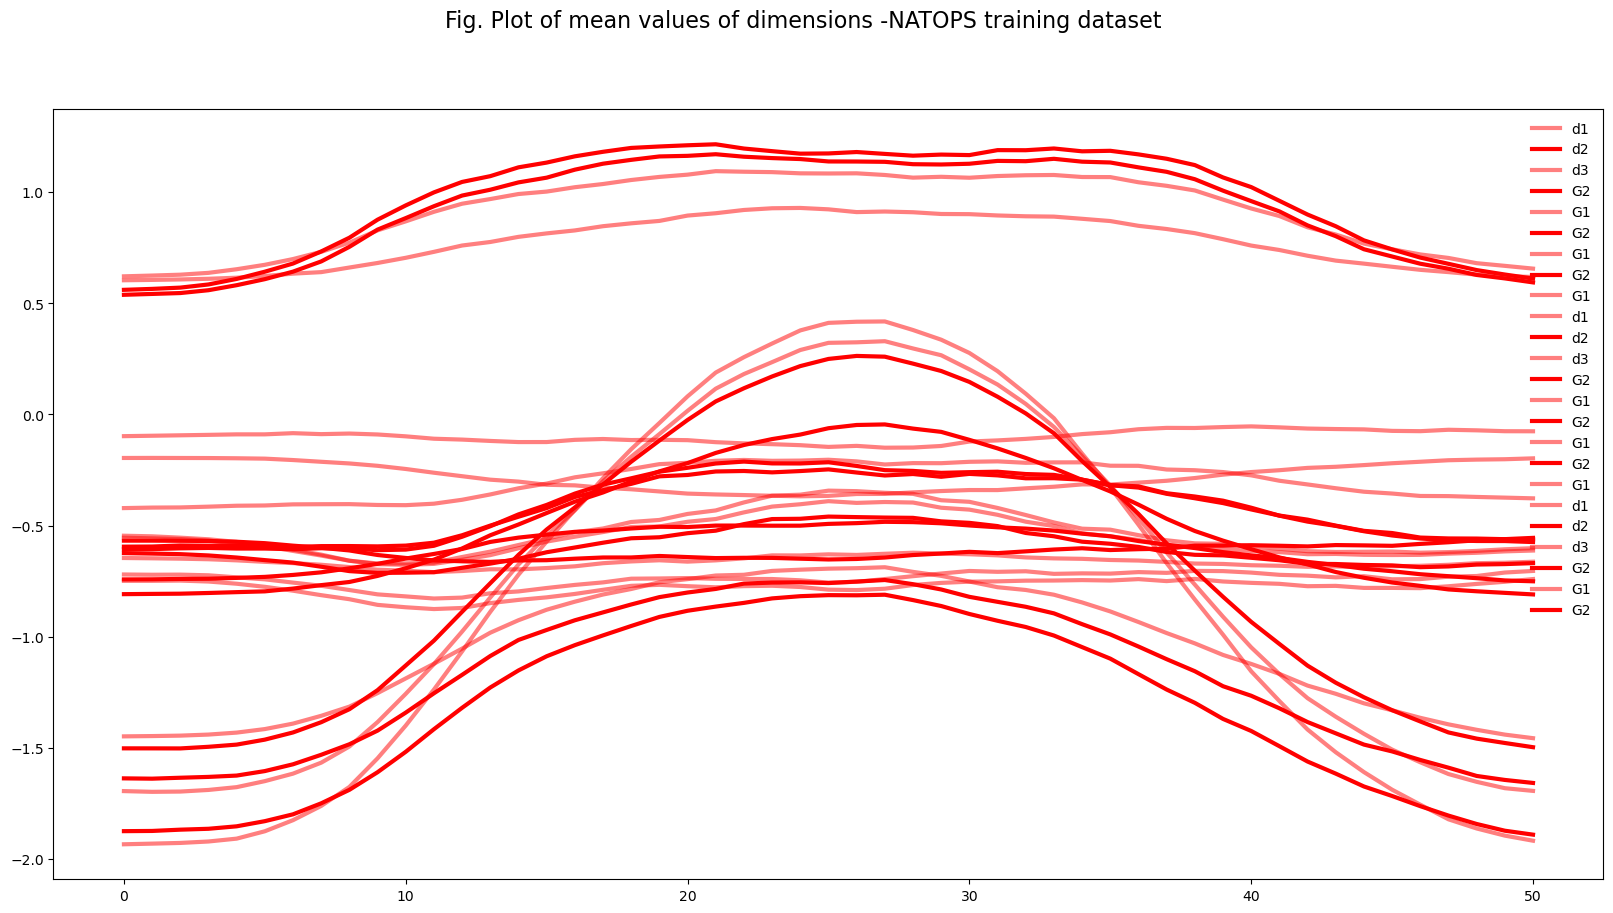

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,51,1)
fig.suptitle("Fig. Plot of mean values of dimensions -NATOPS training dataset",fontsize=16)
ax.plot(ejex, Xa.iloc[0,ejex], color='red',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[1,ejex], color='red', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[2,ejex], color='red', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[3,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[4,ejex], color='red', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[5,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[6,ejex], color='red',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[7,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[8,ejex], color='red',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[9,ejex], color='red',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[10,ejex], color='red', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[11,ejex], color='red', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[12,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[13,ejex], color='red', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[14,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[15,ejex], color='red',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[16,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[17,ejex], color='red',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[18,ejex], color='red',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[19,ejex], color='red', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[20,ejex], color='red', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[21,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[22,ejex], color='red', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[23,ejex], color='red', lw=3, label='G2')
ax.legend(loc='best', frameon=False)

In [54]:
#class size in training
import numpy as np
np.sum(y,axis=0)

array([30, 30, 30, 30, 30, 30])

(9180, 24)


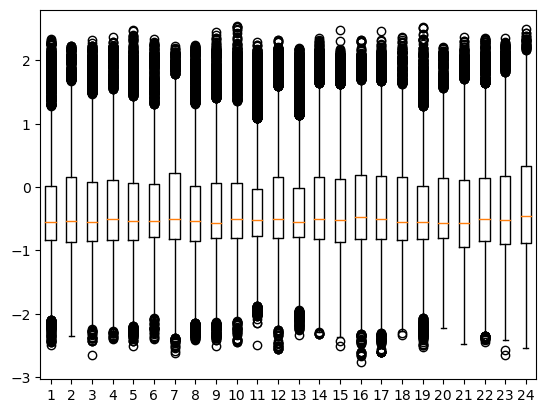

In [55]:
#Boxplot of features in the traoning dataset
tempotr=X.reshape(X.shape[2],-1).T
tempodftr=pd.DataFrame(tempotr)
print(tempodftr.shape)
pyplot.boxplot(tempodftr)
pyplot.show()

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>,
        <Axes: title={'center': '2'}, xlabel='[group]'>,
        <Axes: title={'center': '3'}, xlabel='[group]'>,
        <Axes: title={'center': '4'}, xlabel='[group]'>],
       [<Axes: title={'center': '5'}, xlabel='[group]'>,
        <Axes: title={'center': '6'}, xlabel='[group]'>,
        <Axes: title={'center': '7'}, xlabel='[group]'>,
        <Axes: title={'center': '8'}, xlabel='[group]'>,
        <Axes: title={'center': '9'}, xlabel='[group]'>],
       [<Axes: title={'center': '10'}, xlabel='[group]'>,
        <Axes: title={'center': '11'}, xlabel='[group]'>,
        <Axes: title={'center': '12'}, xlabel='[group]'>,
        <Axes: title={'center': '13'}, xlabel='[group]'>,
        <Axes: title={'center': '14'}, xlabel='[group]'>],
       [<Axes: title={'center': '15'}, xlabel='[group]'>,
        <Axes: title={'center': '16'}, xlabel='[group]'>,
        <Axes: title=

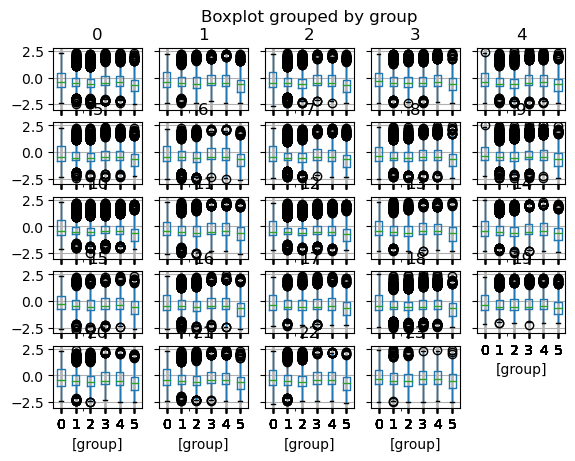

In [56]:
#Boxplots of each feature inthe groups pf the training dataset
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
temptr.boxplot(by='group')

In [57]:
temptr.groupby('group').mean()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
group,,,,,,,,,,,,,,,,,,,,,
0,-0.307139,-0.262256,-0.300345,-0.234376,-0.290344,-0.274300,-0.274802,-0.314537,-0.278030,-0.237940,...,-0.278515,-0.241501,-0.254221,-0.253755,-0.271725,-0.241569,-0.311300,-0.240135,-0.316325,-0.240863
1,-0.443707,-0.383491,-0.403869,-0.410926,-0.428687,-0.407418,-0.360711,-0.411491,-0.402062,-0.375112,...,-0.399200,-0.388261,-0.350233,-0.398449,-0.396745,-0.377139,-0.439627,-0.367280,-0.440942,-0.372244
2,-0.519359,-0.467242,-0.508294,-0.435548,-0.507923,-0.467496,-0.471168,-0.512049,-0.488323,-0.448694,...,-0.478996,-0.440186,-0.457648,-0.442924,-0.466567,-0.406651,-0.542172,-0.460785,-0.539057,-0.446942
3,-0.302513,-0.295406,-0.258949,-0.338549,-0.271237,-0.294650,-0.231829,-0.266239,-0.283915,-0.256179,...,-0.270057,-0.271994,-0.220824,-0.314046,-0.313420,-0.275384,-0.279889,-0.232030,-0.282589,-0.222499
4,-0.332056,-0.330086,-0.314194,-0.316365,-0.289724,-0.317990,-0.302061,-0.320983,-0.328372,-0.281335,...,-0.316324,-0.292809,-0.293192,-0.331887,-0.348964,-0.291988,-0.325997,-0.274268,-0.320995,-0.249856
5,-0.673596,-0.637374,-0.688136,-0.554702,-0.615518,-0.621601,-0.662107,-0.703635,-0.646415,-0.605018,...,-0.634393,-0.561759,-0.668578,-0.609868,-0.672498,-0.585503,-0.695342,-0.611478,-0.667997,-0.524675


### Distances

In [58]:
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([0.62226322, 1.00013029, 0.17643762, 0.22454543, 1.78447219,
       0.39941874, 0.61551193, 0.44610012, 1.18651136, 1.00736562,
       0.82471414, 0.79783581, 0.20179974, 1.78430212, 1.59782333])

In [59]:
distances.max()

1.784472190907171

In [60]:
distances.min()

0.17643761529066868

In [61]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)

(4320, 51)


### Distance groups training

In [62]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([0.62226322, 1.00013029, 0.17643762, 0.22454543, 1.78447219,
       0.39941874, 0.61551193, 0.44610012, 1.18651136, 1.00736562,
       0.82471414, 0.79783581, 0.20179974, 1.78430212, 1.59782333])

In [63]:
distances.max()

1.784472190907171

In [64]:
distances.min()

0.17643761529066868

In [65]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(51,)

In [66]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()

In [67]:
ts1=a.iloc[5,:]
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.451374
p-value: 0.000000
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599


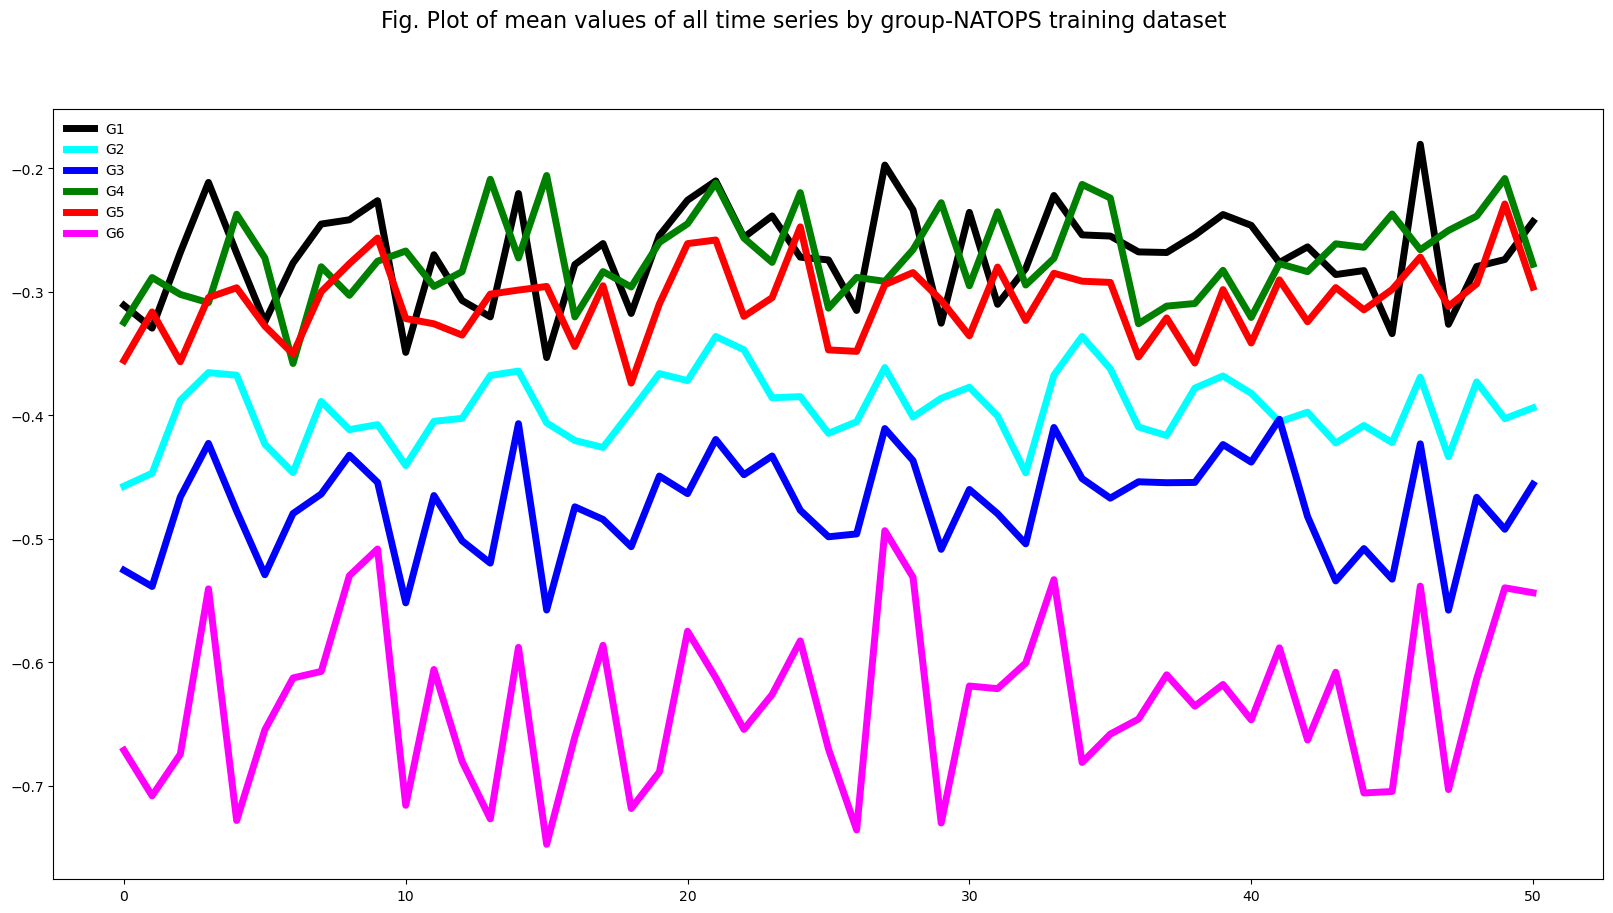

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,51,1)
fig.suptitle("Fig. Plot of mean values of all time series by group-NATOPS training dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='black',lw=5,  label='G1')
ax.plot(ejex, a.iloc[1,ejex], color='cyan', lw=5, label='G2')
ax.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax.plot(ejex, a.iloc[3,ejex], color='green', lw=5, label='G4')
ax.plot(ejex, a.iloc[4,ejex], color='red', lw=5,  label='G5')
ax.plot(ejex, a.iloc[5,ejex], color='magenta', lw=5, label='G6')
ax.legend(loc='best', frameon=False)

### Feature Selection

In [69]:
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:51]
scores1 = mutual_info_classif(Xm,ym)
#scores /= scores.max()
importance1=[i for i,v in enumerate(scores1) if v > .01]
len(importance1)*100/51

47.05882352941177

In [70]:
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores)
#crtucal p-value=.10
importance=[i for i,v in enumerate(scores) if v > 1]
len(importance)*100/51

100.0

### Testing data

In [71]:
# loading Testing data
Xt, yt = load_data("NATOPS",split="Test")

 Shape of X =  (180, 24, 51)
 Shape of y =  (180,)
 New shape of X =  (180, 51, 24)
 New shape of y =  (180, 6)


In [72]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([30, 30, 30, 30, 30, 30])

In [73]:
#Computing random guessing
a=np.sum(yt,axis=0)
np.max(a/Xt.shape[0])

0.16666666666666666

In [74]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

(9180, 24)


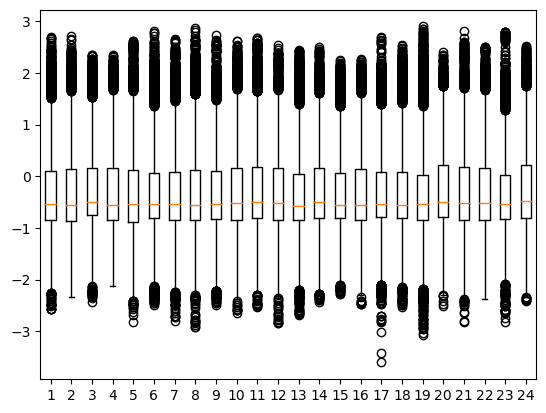

In [75]:
#Boxplot of features in the testing dataset
tempote=Xt.reshape(Xt.shape[2],-1).T
tempodfte=pd.DataFrame(tempote)
print(tempodfte.shape)
pyplot.boxplot(tempodfte)
pyplot.show()

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>,
        <Axes: title={'center': '2'}, xlabel='[group]'>,
        <Axes: title={'center': '3'}, xlabel='[group]'>,
        <Axes: title={'center': '4'}, xlabel='[group]'>],
       [<Axes: title={'center': '5'}, xlabel='[group]'>,
        <Axes: title={'center': '6'}, xlabel='[group]'>,
        <Axes: title={'center': '7'}, xlabel='[group]'>,
        <Axes: title={'center': '8'}, xlabel='[group]'>,
        <Axes: title={'center': '9'}, xlabel='[group]'>],
       [<Axes: title={'center': '10'}, xlabel='[group]'>,
        <Axes: title={'center': '11'}, xlabel='[group]'>,
        <Axes: title={'center': '12'}, xlabel='[group]'>,
        <Axes: title={'center': '13'}, xlabel='[group]'>,
        <Axes: title={'center': '14'}, xlabel='[group]'>],
       [<Axes: title={'center': '15'}, xlabel='[group]'>,
        <Axes: title={'center': '16'}, xlabel='[group]'>,
        <Axes: title=

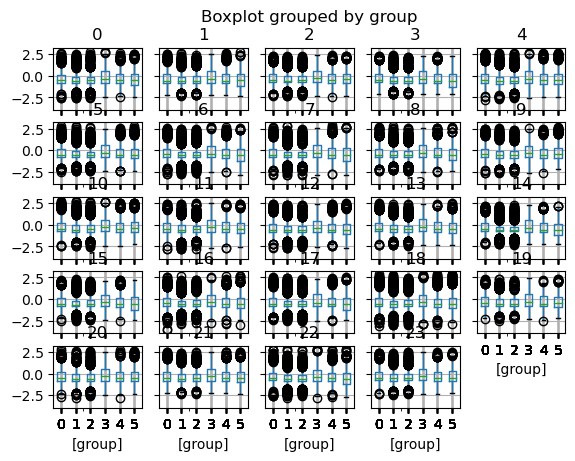

In [76]:
#Boxplors of features in each group of the testing dataset
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Boxplot  of features by class in testing
tempte.boxplot(by='group')

In [77]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA1.shape)

(4320, 51)


In [78]:
tempoB1=pd.DataFrame(tempoA1)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempoB1['group'] = [next(variables) for variable in range(len(tempoB1))]
#Bboxplot  of features by class
a1=tempoB1.groupby('group').mean()

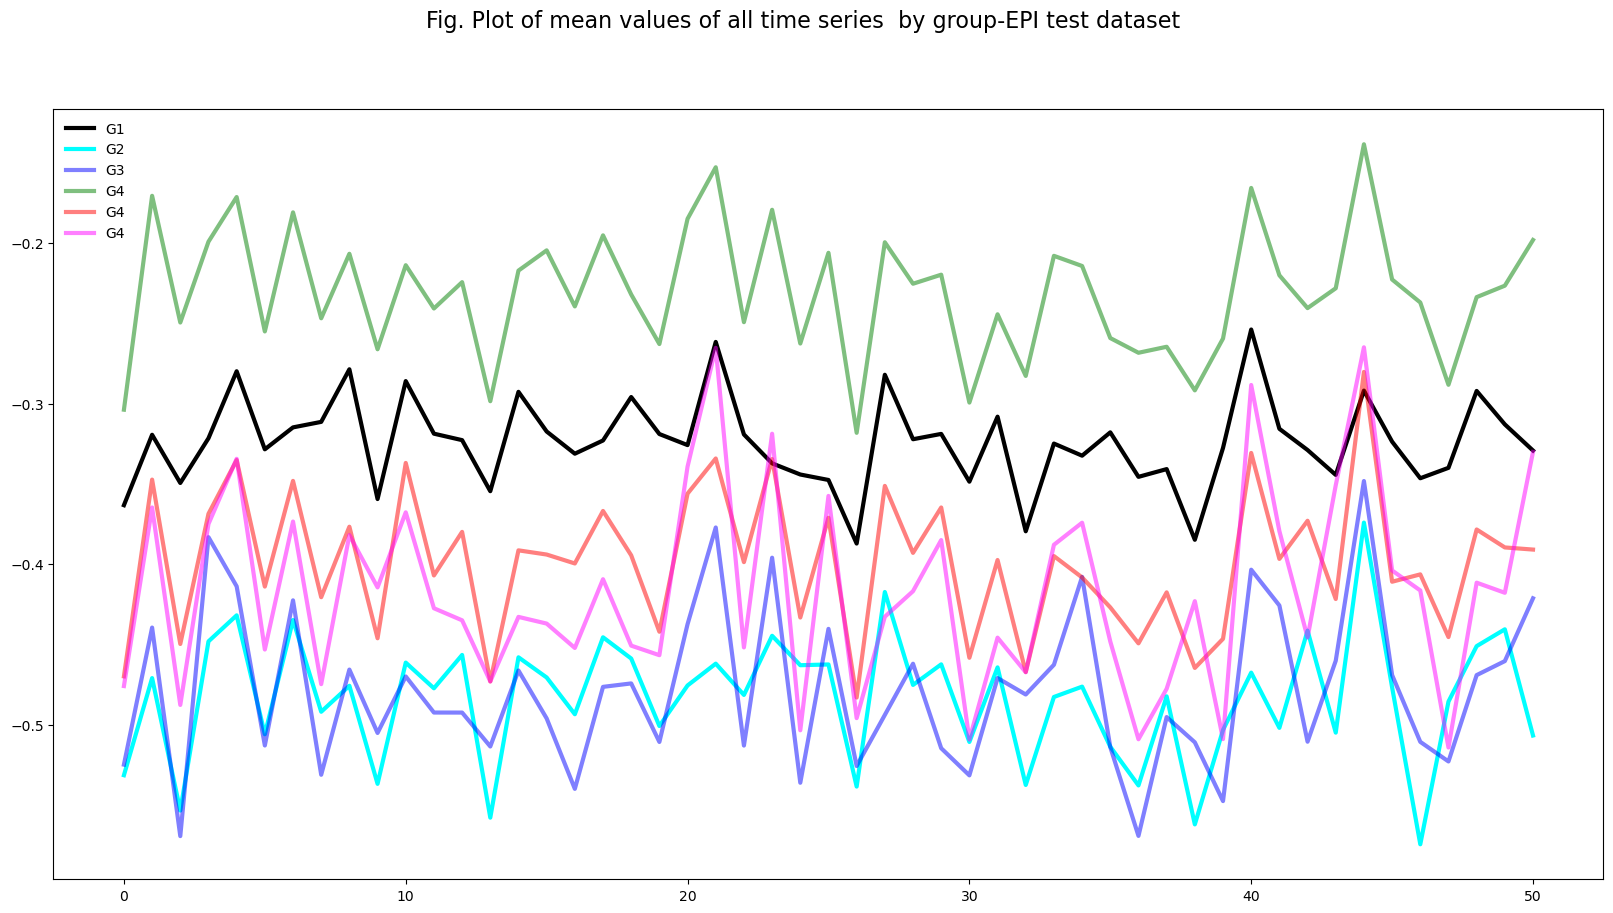

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,51,1)
fig.suptitle("Fig. Plot of mean values of all time series  by group-EPI test dataset",fontsize=16)
ax.plot(ejex, a1.iloc[0,ejex], color='black',lw=3,  label='G1')
ax.plot(ejex,a1.iloc[1,ejex], color='cyan', lw=3, label='G2')
ax.plot(ejex, a1.iloc[2,ejex], color='blue', lw=3, alpha=0.5, label='G3')
ax.plot(ejex, a1.iloc[3,ejex], color='green', lw=3, alpha=0.5, label='G4')
ax.plot(ejex, a1.iloc[4,ejex], color='red', lw=3, alpha=0.5, label='G4')
ax.plot(ejex, a1.iloc[5,ejex], color='magenta', lw=3, alpha=0.5, label='G4')
ax.legend(loc='best', frameon=False)

In [80]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)

(360, 51, 24)


(9180, 24)


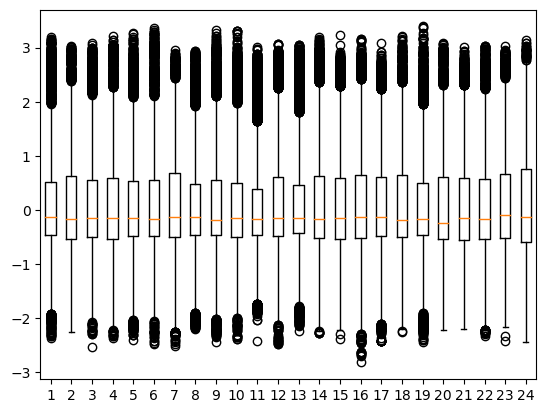

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tempo=X.reshape(X.shape[2],-1).T
#print(tempo.shape)
X = scaler.fit_transform(X.reshape(X.shape[2], -1)).reshape(X.shape)
Xb = scaler.fit_transform(Xb.reshape(Xb.shape[2], -1)).reshape(Xb.shape)
Xt = scaler.fit_transform(Xt.reshape(Xt.shape[2], -1)).reshape(Xt.shape)
X1 = scaler.fit_transform(tempo)
#print(X)
tempodf=pd.DataFrame(X1)
print(tempodf.shape)
pyplot.boxplot(tempodf)
pyplot.show()

In [82]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

(51,)

In [83]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)
dst

0.3111657523517633

In [84]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
Xest = tempoB.iloc[150,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.050012
p-value: 0.994767
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
